###LOAD LIBRARY

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors

In [ ]:
# settings to display all columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows",None)

In [ ]:
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

###LOAD DATA SET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/')

Mounted at /content/drive


In [ ]:
data =pd.read_csv('/content/drive/My Drive/Colab Notebooks/SKRIPSI/datalapormasyarakat.csv', index_col=0)

###BACA DATA

In [ ]:
data.head()

,Tgl Kejadian,Alamat,Keterangan Alamat,Deskripsi,Topik Laporan,Sumber,Instansi Terdisposisi
ID,,,,,,,
13291,2019-08-12 17:42:43,"Jl. Nogososro No.98, Tlogosari Kulon, Kec. Ped...","selamat sore, mohon ijin \nsampah sudah menump...","selamat sore, mohon ijin \nsampah sudah menump...",Selokan Mampet;,Mobile Apps,Dinas Pekerjaan Umum;
14538,2019-12-31 19:45:49,"Jl. HR Hadiyanto No.24, Sukorejo, Kec. Gn. Pat...",Akibat pekerjaan penggalian instalasi PDAM yg...,Akibat pekerjaan penggalian instalasi PDAM yg...,Selokan;,Mobile Apps,Dinas Pekerjaan Umum;
12475,2019-05-09 09:28:20,Jl. Sriwijaya Wonodri Semarang Sel.,NaN,Pak @hendrarprihadi Terima kasih jalan Sriwija...,Pembatas Jalan;,Contact Center,Dinas Pekerjaan Umum;
12497,2019-05-09 10:59:21,Jl. Kapten Piere Tendean Sekayu Semarang Tengah,NaN,"TELEGRAM \nWaspada.\nAda beberapa titik , jala...",Jalan Rusak;,Contact Center,Dinas Pekerjaan Umum;
12905,2019-07-08 07:37:02,"Jl. Mataram No.920, Peterongan, Kec. Semarang ...",NaN,Kondisi trotoar depan ruko metro peterongan. B...,Trotoar;,Contact Center,Dinas Pekerjaan Umum;


In [ ]:
data.tail()

,Tgl Kejadian,Alamat,Keterangan Alamat,Deskripsi,Topik Laporan,Sumber,Instansi Terdisposisi
ID,,,,,,,
86814,2023-12-30 20:55:42,Semarang Semarang City Central Java,NaN,Sambat dari warga masyarakat\nYo Ojo mung miki...,Banjir;,LaporGub,Dinas Pekerjaan Umum;
86817,2023-12-30 21:23:49,Jalan Dokter Cipto Kebonagung Kec. Semarang Tim.,NaN,Mohon penanganan\nbanjir di JI.Dr.Cipto terkhu...,Banjir;,LaporGub,Dinas Pekerjaan Umum;
86851,2023-12-31 18:37:04,Jl. Pemuda Dadapsari Kec. Semarang Utara,NaN,Saya kira hanya\nmengurangi..tidak menghilangk...,Banjir;,LaporGub,Dinas Pekerjaan Umum;
86788,2023-12-30 08:19:52,"Jl. Sidoluhur I No.36, Muktiharjo Kidul, Kec. ...","Lokasi Gereja di Jln Dr Cipto no 27 Semarang, ...","Minta tolong tindak lanjut, kali di depan GKJT...",Selokan Mampet;,Mobile Apps,Dinas Pekerjaan Umum;
86765,2023-12-28 20:45:53,"Cakrawala 1, Gisikdrono, Kec. Semarang Barat, ...",NaN,Mohon di depan Halte Cakrawala arah ke Mangkan...,Jalan Rusak;,LaporGub,Dinas Pekerjaan Umum;


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3105 entries, 13291 to 86765
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Tgl Kejadian           3105 non-null   object
 1   Alamat                 3100 non-null   object
 2   Keterangan Alamat      2070 non-null   object
 3   Deskripsi              3105 non-null   object
 4   Topik Laporan          3105 non-null   object
 5   Sumber                 3105 non-null   object
 6   Instansi Terdisposisi  3105 non-null   object
dtypes: object(7)
memory usage: 194.1+ KB


##EDA

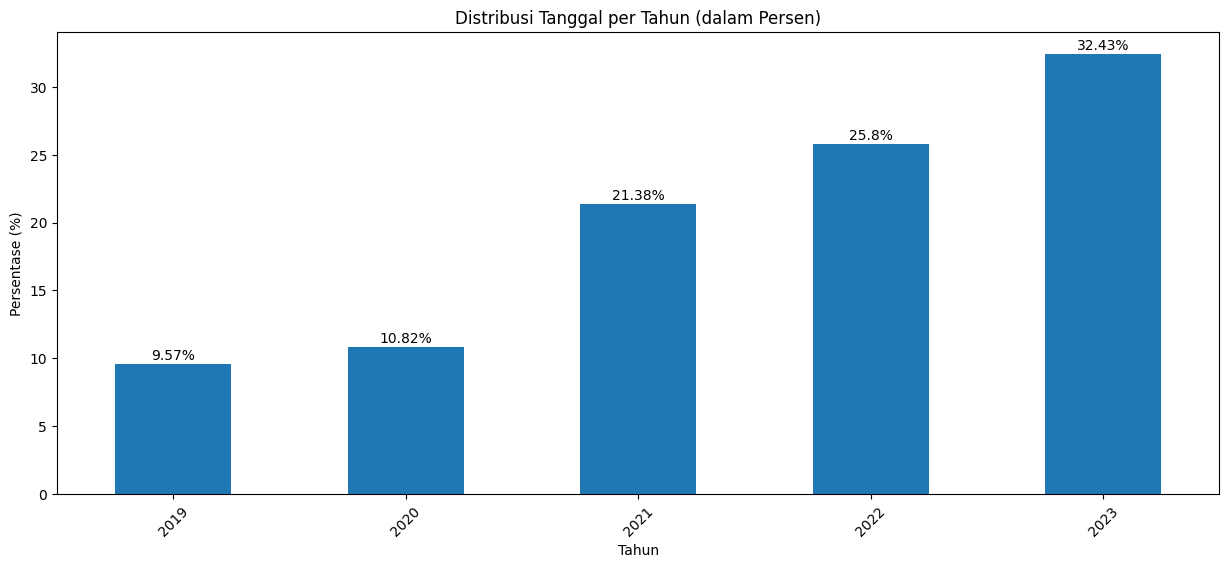

In [ ]:
import pandas as pd

# Convert 'Tgl Kejadian' column to datetime if it's not already
data['Tgl Kejadian'] = pd.to_datetime(data['Tgl Kejadian'])

# Now you can proceed with your calculations
yearly_counts = data['Tgl Kejadian'].dt.to_period('Y').value_counts().sort_index()

# ... (rest of your code)
# Hitung frekuensi kejadian per tahun
yearly_counts = data['Tgl Kejadian'].dt.to_period('Y').value_counts().sort_index()

# Hitung total kejadian
total_events = yearly_counts.sum()

# Hitung proporsi frekuensi kejadian per tahun dalam persen
yearly_percentage = (yearly_counts / total_events) * 100

# Plot distribusi per tahun dalam persen
plt.figure(figsize=(15, 6))
bars = yearly_percentage.plot(kind='bar')
plt.title('Distribusi Tanggal per Tahun (dalam Persen)')
plt.xlabel('Tahun')
plt.ylabel('Persentase (%)')
plt.xticks(rotation=45)

# Tambahkan label persentase di atas batang plot
for i in bars.patches:
    plt.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1,
             f"{round(i.get_height(), 2)}%", ha='center', va='bottom')

plt.show()

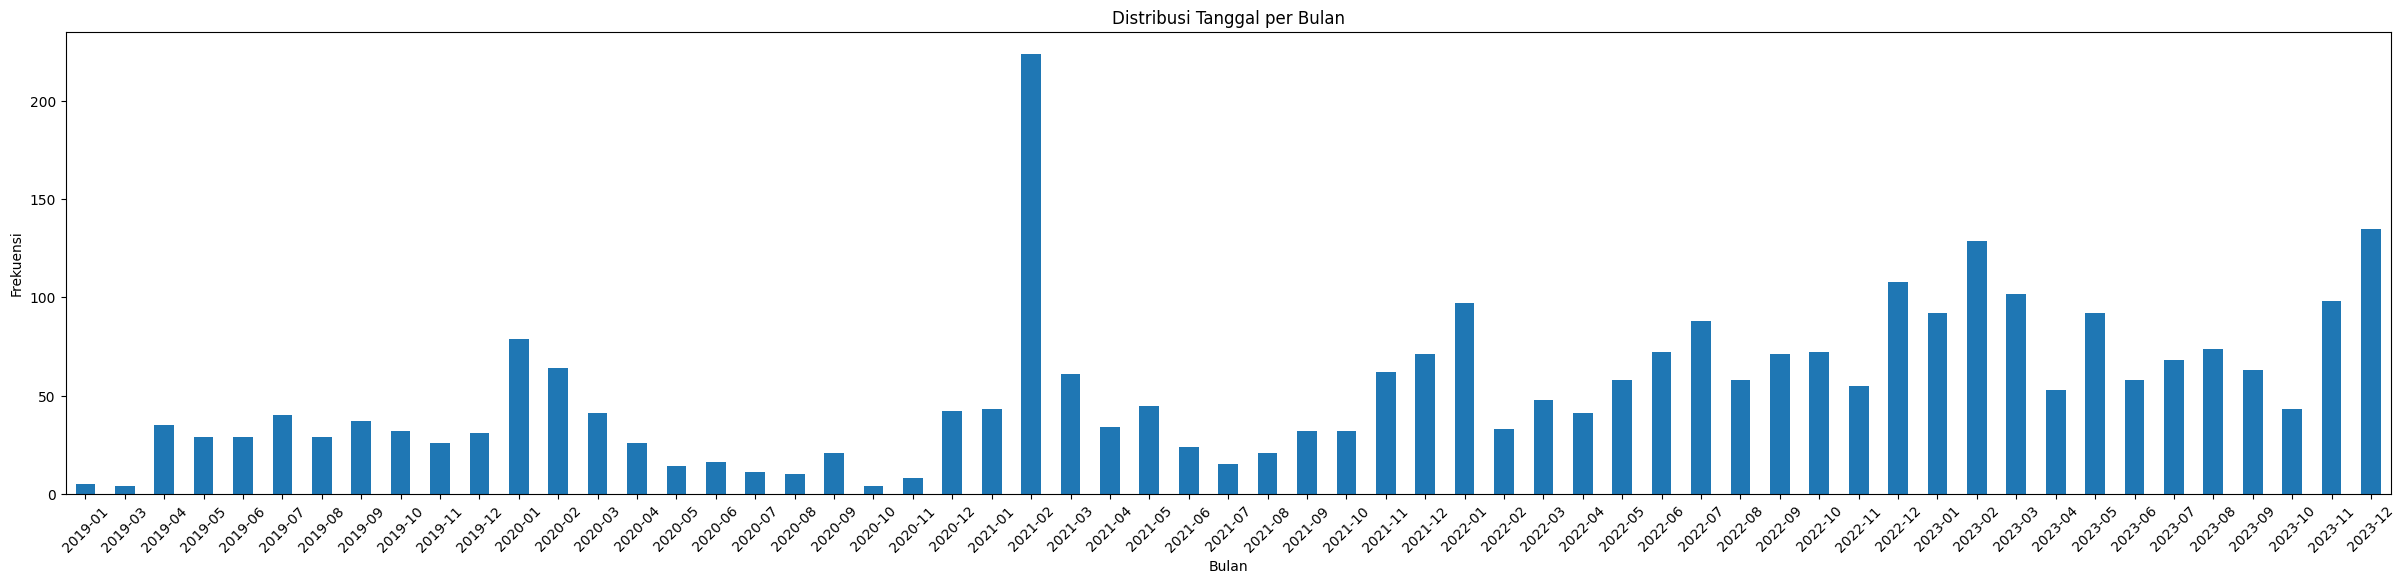

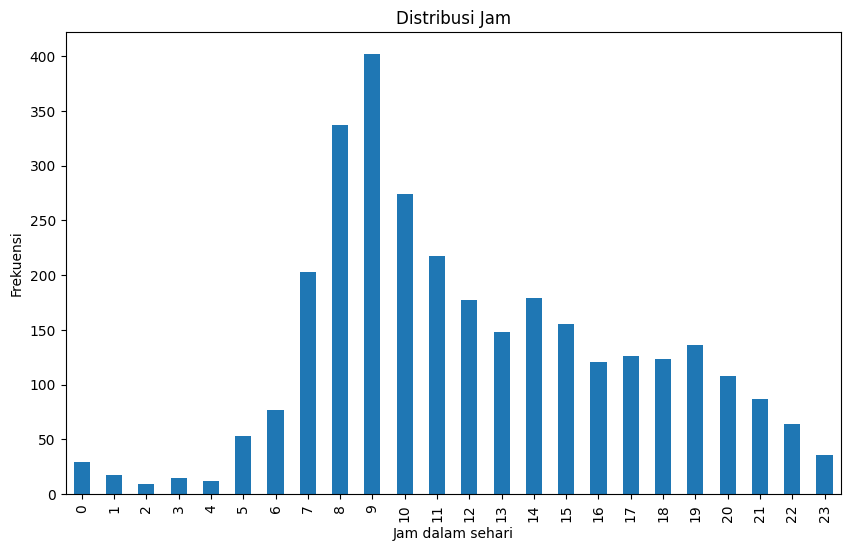

Statistik deskriptif tanggal dan waktu:
count                             3105
mean     2022-02-01 10:10:07.954589184
min                2019-01-03 09:38:00
25%                2021-02-22 18:37:35
50%                2022-05-22 09:57:25
75%                2023-03-03 15:15:30
max                2023-12-31 18:37:04
Name: Tgl Kejadian, dtype: object


In [ ]:
data['Tgl Kejadian'] = pd.to_datetime(data['Tgl Kejadian'])

monthly_counts = data['Tgl Kejadian'].dt.to_period('M').value_counts().sort_index()

plt.figure(figsize=(30, 6))
monthly_counts.plot(kind='bar')
plt.title('Distribusi Tanggal per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
data['Tgl Kejadian'].dt.hour.value_counts().sort_index().plot(kind='bar')
plt.title('Distribusi Jam')
plt.xlabel('Jam dalam sehari')
plt.ylabel('Frekuensi')
plt.show()

print("Statistik deskriptif tanggal dan waktu:")
print(data['Tgl Kejadian'].describe())

<ipython-input-11-bb50a6ed43c4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,


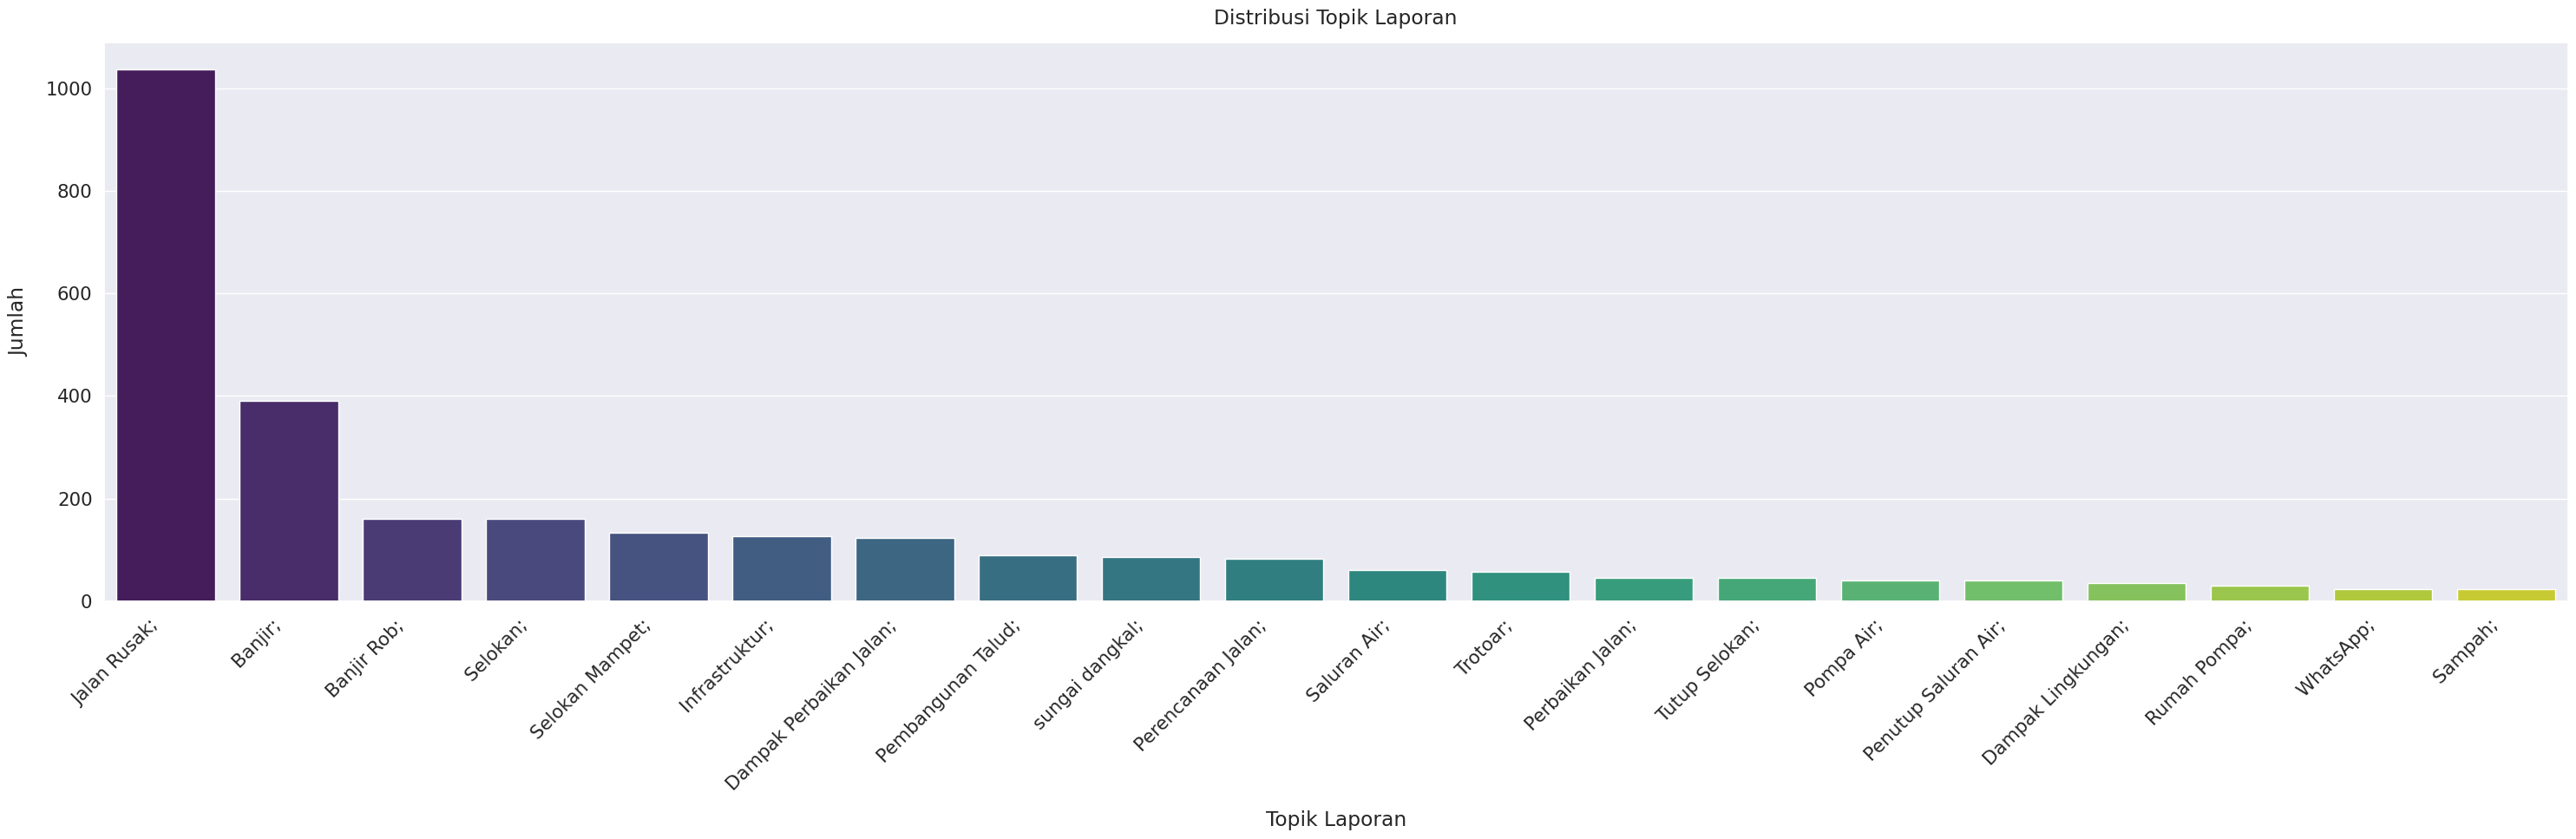

In [ ]:
sns.set(font_scale=1.4)

plt.figure(figsize=(30, 10))

sns.countplot(data=data,
              x='Topik Laporan',
              order=data['Topik Laporan'].value_counts().index[:20],  # Memilih 20 kategori teratas
              palette='viridis')

plt.xlabel("Topik Laporan", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Topik Laporan", y=1.02)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

In [ ]:
print(data['Topik Laporan'].value_counts())

Topik Laporan
Jalan Rusak;                                                        1037
Banjir;                                                              391
Banjir Rob;                                                          161
Selokan;                                                             161
Selokan Mampet;                                                      133
Infrastruktur;                                                       127
Dampak Perbaikan Jalan;                                              124
Pembangunan Talud;                                                    90
sungai dangkal;                                                       86
Perencanaan Jalan;                                                    83
Saluran Air;                                                          60
Trotoar;                                                              58
Perbaikan Jalan;                                                      46
Tutup Selokan;                       

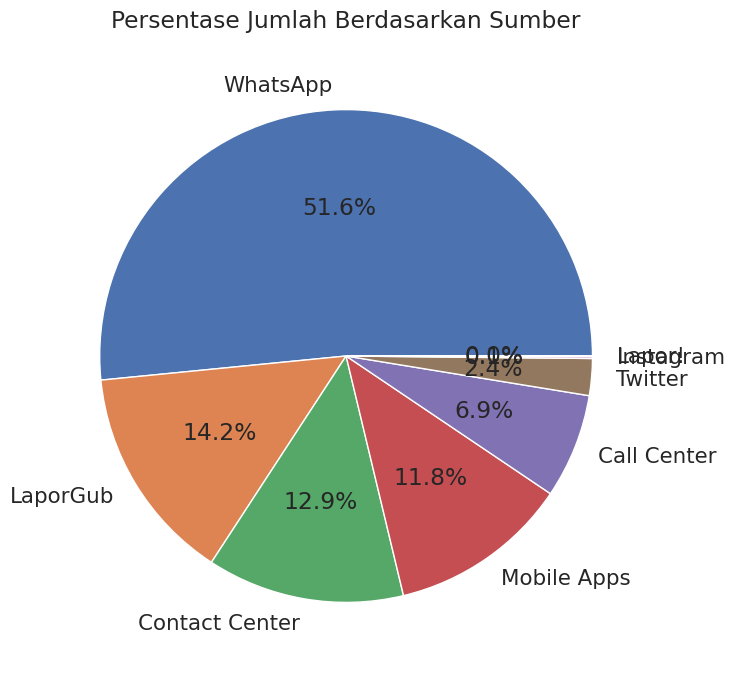

In [ ]:
sns.set(font_scale=1.4)
data['Sumber'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title("Persentase Jumlah Berdasarkan Sumber", y=1.02)
plt.ylabel("")
plt.show()

##PREPROCESSING

In [ ]:
data.rename(columns={'Topik Laporan': 'jenis_laporan'}, inplace=True)

In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 11.4 MB/s eta 0:00:00


In [ ]:
import nltk
import re
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory # This import will work after installing the library
from nltk.corpus import stopwords
import pandas as pd
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
data['jenis_laporan'] = data['jenis_laporan'].str.lower()
data['Deskripsi'] = data['Deskripsi'].str.lower()

"Mengubah teks menjadi huruf kecil"

In [ ]:
# Download stopwords dan tokenizer
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Stopwords Bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

In [ ]:
# Buat stemmer Bahasa Indonesia
factory = StemmerFactory()
stemmer = factory.create_stemmer()

1. Case Folding

In [ ]:
data['case_folding'] = data['jenis_laporan'].str.lower()
data.head()

,Tgl Kejadian,Alamat,Keterangan Alamat,Deskripsi,jenis_laporan,Sumber,Instansi Terdisposisi,case_folding
ID,,,,,,,,
13291,2019-08-12 17:42:43,"Jl. Nogososro No.98, Tlogosari Kulon, Kec. Ped...","selamat sore, mohon ijin \nsampah sudah menump...","selamat sore, mohon ijin \nsampah sudah menump...",selokan mampet;,Mobile Apps,Dinas Pekerjaan Umum;,selokan mampet;
14538,2019-12-31 19:45:49,"Jl. HR Hadiyanto No.24, Sukorejo, Kec. Gn. Pat...",Akibat pekerjaan penggalian instalasi PDAM yg...,akibat pekerjaan penggalian instalasi pdam yg...,selokan;,Mobile Apps,Dinas Pekerjaan Umum;,selokan;
12475,2019-05-09 09:28:20,Jl. Sriwijaya Wonodri Semarang Sel.,NaN,pak @hendrarprihadi terima kasih jalan sriwija...,pembatas jalan;,Contact Center,Dinas Pekerjaan Umum;,pembatas jalan;
12497,2019-05-09 10:59:21,Jl. Kapten Piere Tendean Sekayu Semarang Tengah,NaN,"telegram \nwaspada.\nada beberapa titik , jala...",jalan rusak;,Contact Center,Dinas Pekerjaan Umum;,jalan rusak;
12905,2019-07-08 07:37:02,"Jl. Mataram No.920, Peterongan, Kec. Semarang ...",NaN,kondisi trotoar depan ruko metro peterongan. b...,trotoar;,Contact Center,Dinas Pekerjaan Umum;,trotoar;


2. Remove Puncation

In [ ]:
import string

def remove_punctuation(text):
  """Menghapus tanda baca dari teks."""
  return text.translate(str.maketrans('', '', string.punctuation))

data['remove_punctuation'] = data['case_folding'].apply(remove_punctuation)
data.head()

,Tgl Kejadian,Alamat,Keterangan Alamat,Deskripsi,jenis_laporan,Sumber,Instansi Terdisposisi,case_folding,remove_punctuation
ID,,,,,,,,,
13291,2019-08-12 17:42:43,"Jl. Nogososro No.98, Tlogosari Kulon, Kec. Ped...","selamat sore, mohon ijin \nsampah sudah menump...","selamat sore, mohon ijin \nsampah sudah menump...",selokan mampet;,Mobile Apps,Dinas Pekerjaan Umum;,selokan mampet;,selokan mampet
14538,2019-12-31 19:45:49,"Jl. HR Hadiyanto No.24, Sukorejo, Kec. Gn. Pat...",Akibat pekerjaan penggalian instalasi PDAM yg...,akibat pekerjaan penggalian instalasi pdam yg...,selokan;,Mobile Apps,Dinas Pekerjaan Umum;,selokan;,selokan
12475,2019-05-09 09:28:20,Jl. Sriwijaya Wonodri Semarang Sel.,NaN,pak @hendrarprihadi terima kasih jalan sriwija...,pembatas jalan;,Contact Center,Dinas Pekerjaan Umum;,pembatas jalan;,pembatas jalan
12497,2019-05-09 10:59:21,Jl. Kapten Piere Tendean Sekayu Semarang Tengah,NaN,"telegram \nwaspada.\nada beberapa titik , jala...",jalan rusak;,Contact Center,Dinas Pekerjaan Umum;,jalan rusak;,jalan rusak
12905,2019-07-08 07:37:02,"Jl. Mataram No.920, Peterongan, Kec. Semarang ...",NaN,kondisi trotoar depan ruko metro peterongan. b...,trotoar;,Contact Center,Dinas Pekerjaan Umum;,trotoar;,trotoar


3. Remove Stopwords

In [ ]:
!pip install nltk # Install the nltk library
import nltk # import the nltk library
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words_id = stopwords.words('indonesian')

def remove_stopwords_id(text):
  text = ' '.join([word for word in text.split() if word not in stop_words_id])
  return text

data['remove_stopwords'] = data['remove_punctuation'].apply(remove_stopwords_id)
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Tgl Kejadian,Alamat,Keterangan Alamat,Deskripsi,jenis_laporan,Sumber,Instansi Terdisposisi,case_folding,remove_punctuation,remove_stopwords
ID,,,,,,,,,,
13291,2019-08-12 17:42:43,"Jl. Nogososro No.98, Tlogosari Kulon, Kec. Ped...","selamat sore, mohon ijin \nsampah sudah menump...","selamat sore, mohon ijin \nsampah sudah menump...",selokan mampet;,Mobile Apps,Dinas Pekerjaan Umum;,selokan mampet;,selokan mampet,selokan mampet
14538,2019-12-31 19:45:49,"Jl. HR Hadiyanto No.24, Sukorejo, Kec. Gn. Pat...",Akibat pekerjaan penggalian instalasi PDAM yg...,akibat pekerjaan penggalian instalasi pdam yg...,selokan;,Mobile Apps,Dinas Pekerjaan Umum;,selokan;,selokan,selokan
12475,2019-05-09 09:28:20,Jl. Sriwijaya Wonodri Semarang Sel.,NaN,pak @hendrarprihadi terima kasih jalan sriwija...,pembatas jalan;,Contact Center,Dinas Pekerjaan Umum;,pembatas jalan;,pembatas jalan,pembatas jalan
12497,2019-05-09 10:59:21,Jl. Kapten Piere Tendean Sekayu Semarang Tengah,NaN,"telegram \nwaspada.\nada beberapa titik , jala...",jalan rusak;,Contact Center,Dinas Pekerjaan Umum;,jalan rusak;,jalan rusak,jalan rusak
12905,2019-07-08 07:37:02,"Jl. Mataram No.920, Peterongan, Kec. Semarang ...",NaN,kondisi trotoar depan ruko metro peterongan. b...,trotoar;,Contact Center,Dinas Pekerjaan Umum;,trotoar;,trotoar,trotoar


In [ ]:
!pip install nltk # Install the nltk library
import nltk # import the nltk library
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words_id = stopwords.words('indonesian')

def remove_stopwords_id(text):
  text = ' '.join([word for word in text.split() if word not in stop_words_id])
  return text

data['remove_stopwords_Des'] = data['Deskripsi'].apply(remove_stopwords_id)
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Tgl Kejadian,Alamat,Keterangan Alamat,Deskripsi,jenis_laporan,Sumber,Instansi Terdisposisi,case_folding,remove_punctuation,remove_stopwords,remove_stopwords_Des
ID,,,,,,,,,,,
13291,2019-08-12 17:42:43,"Jl. Nogososro No.98, Tlogosari Kulon, Kec. Ped...","selamat sore, mohon ijin \nsampah sudah menump...","selamat sore, mohon ijin \nsampah sudah menump...",selokan mampet;,Mobile Apps,Dinas Pekerjaan Umum;,selokan mampet;,selokan mampet,selokan mampet,"selamat sore, mohon ijin sampah menumpuk banta..."
14538,2019-12-31 19:45:49,"Jl. HR Hadiyanto No.24, Sukorejo, Kec. Gn. Pat...",Akibat pekerjaan penggalian instalasi PDAM yg...,akibat pekerjaan penggalian instalasi pdam yg...,selokan;,Mobile Apps,Dinas Pekerjaan Umum;,selokan;,selokan,selokan,akibat pekerjaan penggalian instalasi pdam yg ...
12475,2019-05-09 09:28:20,Jl. Sriwijaya Wonodri Semarang Sel.,NaN,pak @hendrarprihadi terima kasih jalan sriwija...,pembatas jalan;,Contact Center,Dinas Pekerjaan Umum;,pembatas jalan;,pembatas jalan,pembatas jalan,@hendrarprihadi terima kasih jalan sriwijaya m...
12497,2019-05-09 10:59:21,Jl. Kapten Piere Tendean Sekayu Semarang Tengah,NaN,"telegram \nwaspada.\nada beberapa titik , jala...",jalan rusak;,Contact Center,Dinas Pekerjaan Umum;,jalan rusak;,jalan rusak,jalan rusak,"telegram waspada. titik , jalan berlubang memb..."
12905,2019-07-08 07:37:02,"Jl. Mataram No.920, Peterongan, Kec. Semarang ...",NaN,kondisi trotoar depan ruko metro peterongan. b...,trotoar;,Contact Center,Dinas Pekerjaan Umum;,trotoar;,trotoar,trotoar,kondisi trotoar ruko metro peterongan. berbaha...


4. Remove Number

In [ ]:
import re

def remove_numbers(text):
  """Menghapus angka dari teks."""
  return re.sub(r'\d+', '', text)

data['remove_numbers_des'] = data['Deskripsi'].apply(remove_numbers)
data.head()

,Tgl Kejadian,Alamat,Keterangan Alamat,Deskripsi,jenis_laporan,Sumber,Instansi Terdisposisi,case_folding,remove_punctuation,remove_stopwords,remove_stopwords_Des,remove_numbers_des
ID,,,,,,,,,,,,
13291,2019-08-12 17:42:43,"Jl. Nogososro No.98, Tlogosari Kulon, Kec. Ped...","selamat sore, mohon ijin \nsampah sudah menump...","selamat sore, mohon ijin \nsampah sudah menump...",selokan mampet;,Mobile Apps,Dinas Pekerjaan Umum;,selokan mampet;,selokan mampet,selokan mampet,"selamat sore, mohon ijin sampah menumpuk banta...","selamat sore, mohon ijin \nsampah sudah menump..."
14538,2019-12-31 19:45:49,"Jl. HR Hadiyanto No.24, Sukorejo, Kec. Gn. Pat...",Akibat pekerjaan penggalian instalasi PDAM yg...,akibat pekerjaan penggalian instalasi pdam yg...,selokan;,Mobile Apps,Dinas Pekerjaan Umum;,selokan;,selokan,selokan,akibat pekerjaan penggalian instalasi pdam yg ...,akibat pekerjaan penggalian instalasi pdam yg...
12475,2019-05-09 09:28:20,Jl. Sriwijaya Wonodri Semarang Sel.,NaN,pak @hendrarprihadi terima kasih jalan sriwija...,pembatas jalan;,Contact Center,Dinas Pekerjaan Umum;,pembatas jalan;,pembatas jalan,pembatas jalan,@hendrarprihadi terima kasih jalan sriwijaya m...,pak @hendrarprihadi terima kasih jalan sriwija...
12497,2019-05-09 10:59:21,Jl. Kapten Piere Tendean Sekayu Semarang Tengah,NaN,"telegram \nwaspada.\nada beberapa titik , jala...",jalan rusak;,Contact Center,Dinas Pekerjaan Umum;,jalan rusak;,jalan rusak,jalan rusak,"telegram waspada. titik , jalan berlubang memb...","telegram \nwaspada.\nada beberapa titik , jala..."
12905,2019-07-08 07:37:02,"Jl. Mataram No.920, Peterongan, Kec. Semarang ...",NaN,kondisi trotoar depan ruko metro peterongan. b...,trotoar;,Contact Center,Dinas Pekerjaan Umum;,trotoar;,trotoar,trotoar,kondisi trotoar ruko metro peterongan. berbaha...,kondisi trotoar depan ruko metro peterongan. b...


5. Stemming

In [ ]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tqdm import tqdm

# Membuat objek stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Menambahkan progress bar
tqdm.pandas()

def stemming(text):
  """Melakukan stemming pada teks."""
  return stemmer.stem(text)

data['stemming'] = data['remove_stopwords'].progress_apply(stemming)
data.head()

100%|██████████| 3105/3105 [00:06<00:00, 448.44it/s] 


,Tgl Kejadian,Alamat,Keterangan Alamat,Deskripsi,jenis_laporan,Sumber,Instansi Terdisposisi,case_folding,remove_punctuation,remove_stopwords,remove_stopwords_Des,remove_numbers_des,stemming
ID,,,,,,,,,,,,,
13291,2019-08-12 17:42:43,"Jl. Nogososro No.98, Tlogosari Kulon, Kec. Ped...","selamat sore, mohon ijin \nsampah sudah menump...","selamat sore, mohon ijin \nsampah sudah menump...",selokan mampet;,Mobile Apps,Dinas Pekerjaan Umum;,selokan mampet;,selokan mampet,selokan mampet,"selamat sore, mohon ijin sampah menumpuk banta...","selamat sore, mohon ijin \nsampah sudah menump...",selokan mampet
14538,2019-12-31 19:45:49,"Jl. HR Hadiyanto No.24, Sukorejo, Kec. Gn. Pat...",Akibat pekerjaan penggalian instalasi PDAM yg...,akibat pekerjaan penggalian instalasi pdam yg...,selokan;,Mobile Apps,Dinas Pekerjaan Umum;,selokan;,selokan,selokan,akibat pekerjaan penggalian instalasi pdam yg ...,akibat pekerjaan penggalian instalasi pdam yg...,selokan
12475,2019-05-09 09:28:20,Jl. Sriwijaya Wonodri Semarang Sel.,NaN,pak @hendrarprihadi terima kasih jalan sriwija...,pembatas jalan;,Contact Center,Dinas Pekerjaan Umum;,pembatas jalan;,pembatas jalan,pembatas jalan,@hendrarprihadi terima kasih jalan sriwijaya m...,pak @hendrarprihadi terima kasih jalan sriwija...,batas jalan
12497,2019-05-09 10:59:21,Jl. Kapten Piere Tendean Sekayu Semarang Tengah,NaN,"telegram \nwaspada.\nada beberapa titik , jala...",jalan rusak;,Contact Center,Dinas Pekerjaan Umum;,jalan rusak;,jalan rusak,jalan rusak,"telegram waspada. titik , jalan berlubang memb...","telegram \nwaspada.\nada beberapa titik , jala...",jalan rusak
12905,2019-07-08 07:37:02,"Jl. Mataram No.920, Peterongan, Kec. Semarang ...",NaN,kondisi trotoar depan ruko metro peterongan. b...,trotoar;,Contact Center,Dinas Pekerjaan Umum;,trotoar;,trotoar,trotoar,kondisi trotoar ruko metro peterongan. berbaha...,kondisi trotoar depan ruko metro peterongan. b...,trotoar


Mengubah fitur menjadi numerik

In [ ]:
import nltk
import re
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
import string

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Assuming stop_words_id is already defined as in your previous cells

def preprocess_text(text):
    """
    Preprocesses text by applying lowercasing, removing punctuation,
    removing stop words, removing numbers and performing stemming.
    """
    text = text.lower()  # Case folding
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words_id])  # Remove stop words
    text = re.sub(r'\d+', '', text)  # Remove numbers
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = stemmer.stem(text)  # Stemming

    return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data['jenis_laporan'] = data['jenis_laporan'].astype(str).apply(preprocess_text)

In [ ]:
data['Deskripsi'] = data['Deskripsi'].astype(str).apply(preprocess_text)

TF IDF

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer

# Mengubah stop_words_id menjadi list dari set
stop_words_id = list(stopwords.words('indonesian'))  # Menggunakan stop words bahasa Indonesia dalam bentuk list

tfidf = TfidfVectorizer(max_features=1000, stop_words=stop_words_id)
tfidf_matrix = tfidf.fit_transform(data['Deskripsi']).toarray()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


#MISSING VALUES

In [ ]:
# Hitung jumlah missing values
missing_values = data.isnull().sum()

# Hitung persentase missing values
missing_percentage = 100 * data.isnull().sum() / len(data)

# Gabungkan informasi missing values
missing_table = pd.concat([missing_values, missing_percentage], axis=1, keys=['Total', 'Percent'])

print(missing_table)

                       Total    Percent
Tgl Kejadian               0   0.000000
Alamat                     5   0.161031
Keterangan Alamat       1035  33.333333
Deskripsi                  0   0.000000
jenis_laporan              0   0.000000
Sumber                     0   0.000000
Instansi Terdisposisi      0   0.000000
case_folding               0   0.000000
remove_punctuation         0   0.000000
remove_stopwords           0   0.000000
remove_stopwords_Des       0   0.000000
remove_numbers_des         0   0.000000
stemming                   0   0.000000


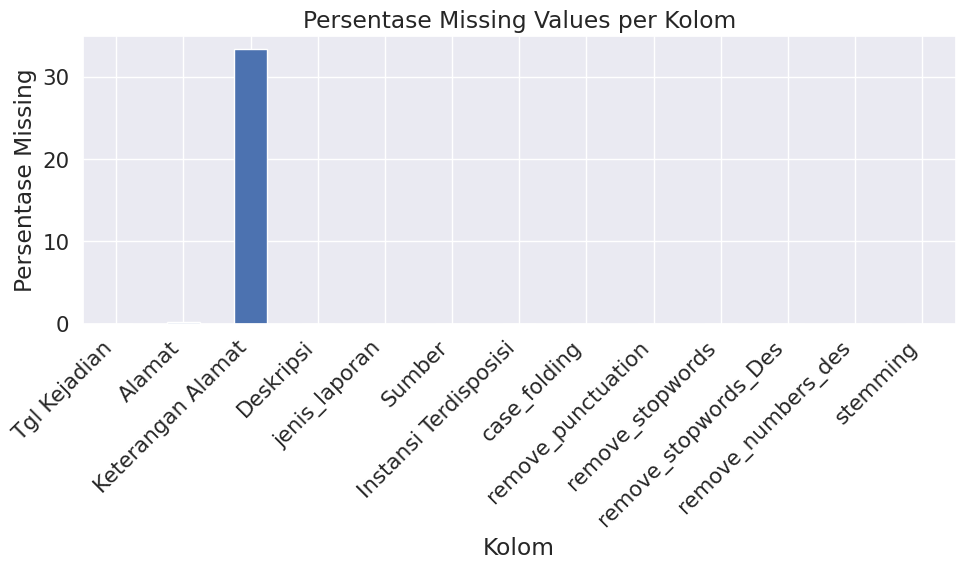

In [ ]:
# Visualisasi missing values
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar')
plt.title('Persentase Missing Values per Kolom')
plt.xlabel('Kolom')
plt.ylabel('Persentase Missing')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Cek missing values
print("Missing values sebelum pembersihan:")
print(data.isnull().sum())

# Menangani missing values
for column in data.columns:
    if data[column].dtype == 'object':
        # Untuk kolom kategorikal, isi dengan modus
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        # Untuk kolom numerik, isi dengan median
        data[column].fillna(data[column].median(), inplace=True)

print("\nMissing values setelah pembersihan:")
print(data.isnull().sum())

Missing values sebelum pembersihan:
Tgl Kejadian                0
Alamat                      5
Keterangan Alamat        1035
Deskripsi                   0
jenis_laporan               0
Sumber                      0
Instansi Terdisposisi       0
case_folding                0
remove_punctuation          0
remove_stopwords            0
remove_stopwords_Des        0
remove_numbers_des          0
stemming                    0
dtype: int64

Missing values setelah pembersihan:
Tgl Kejadian             0
Alamat                   0
Keterangan Alamat        0
Deskripsi                0
jenis_laporan            0
Sumber                   0
Instansi Terdisposisi    0
case_folding             0
remove_punctuation       0
remove_stopwords         0
remove_stopwords_Des     0
remove_numbers_des       0
stemming                 0
dtype: int64


<ipython-input-33-e968e8bd5f80>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)
<ipython-input-33-e968e8bd5f80>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [ ]:
data['jenis_laporan'] = data['jenis_laporan'].astype('category').cat.codes

mengubah jadi num

In [ ]:
data.dropna(subset=['jenis_laporan', 'Deskripsi'], inplace=True)

mengubah nilai hilang

In [ ]:
# Tentukan path direktori
TA = '/content/drive/My Drive/Colab Notebooks/SKRIPSI'

# Tambahkan path ke sistem
sys.path.append(f'{TA}')

# Simpan data yang telah dibersihkan
data.to_csv(f'{TA}/cek.csv', index=False)
print("Data yang telah dibersihkan telah disimpan sebagai 'cek.csv'")

Data yang telah dibersihkan telah disimpan sebagai 'cek.csv'


menyimpan data yang sudah bersih

#K MEANS

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
# Assuming 'X' contains your features to be scaled
X = data[['jenis_laporan']]  # Or select multiple columns using data[['col1', 'col2', ...]]

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your data and transform it
X_scaled = scaler.fit_transform(X)

# Now proceed with PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

# ... (rest of your code)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)  # Assuming 3 clusters: Rendah, Sedang, Tinggi
data['cluster'] = kmeans.fit_predict(X_scaled) # Assign cluster labels to the DataFrame

# ... (rest of your code)

data['urgensi'] = data['cluster'].map({0: 'Rendah', 1: 'Sedang', 2: 'Tinggi'})

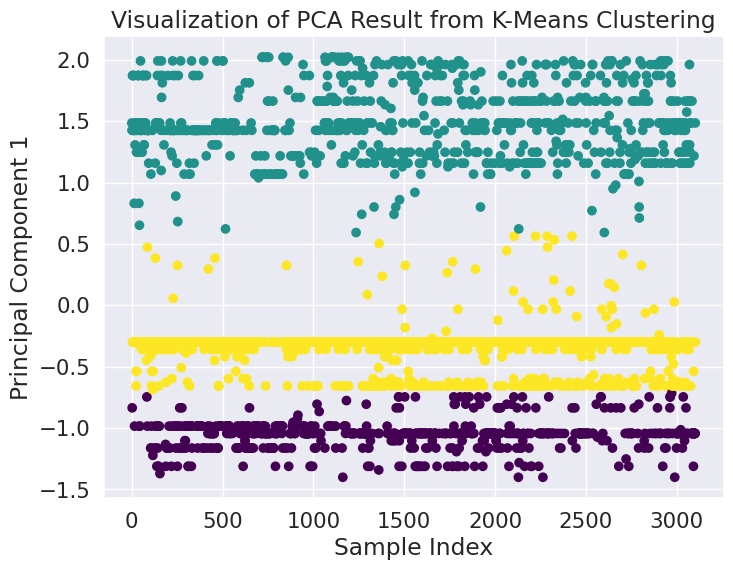

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Change n_components to 1 since your data has only 1 feature
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

# If you still want to visualize in 2D, you may need to engineer additional features
# or use a different dimensionality reduction technique that works with a single feature.

# For now, we'll visualize the single principal component
plt.figure(figsize=(8, 6))
# Since we only have one principal component, we'll plot it against the index
plt.scatter(range(len(X_pca)), X_pca, c=data['cluster'], cmap='viridis')
plt.title('Visualization of PCA Result from K-Means Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Principal Component 1')
plt.show()

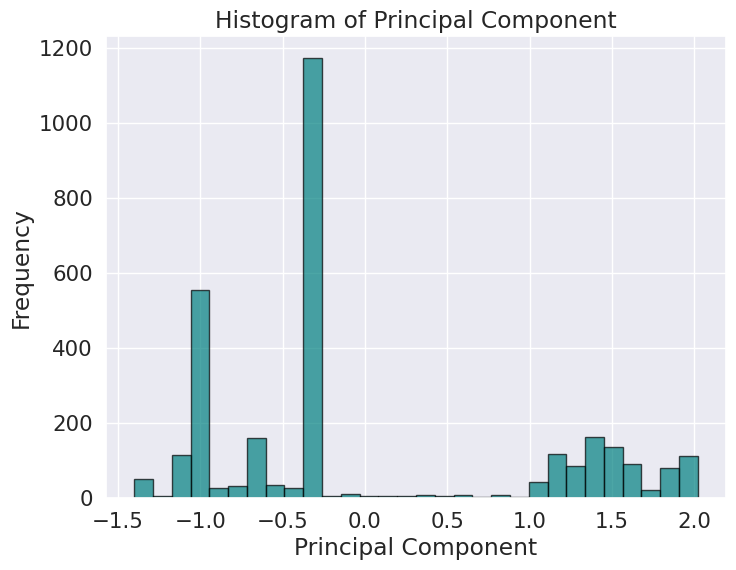

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(X_pca, bins=30, color='teal', edgecolor='black', alpha=0.7)
plt.title('Histogram of Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Frequency')
plt.show()


<ipython-input-42-b42f84a253f1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['cluster'], y=X_pca.flatten(), palette='viridis')


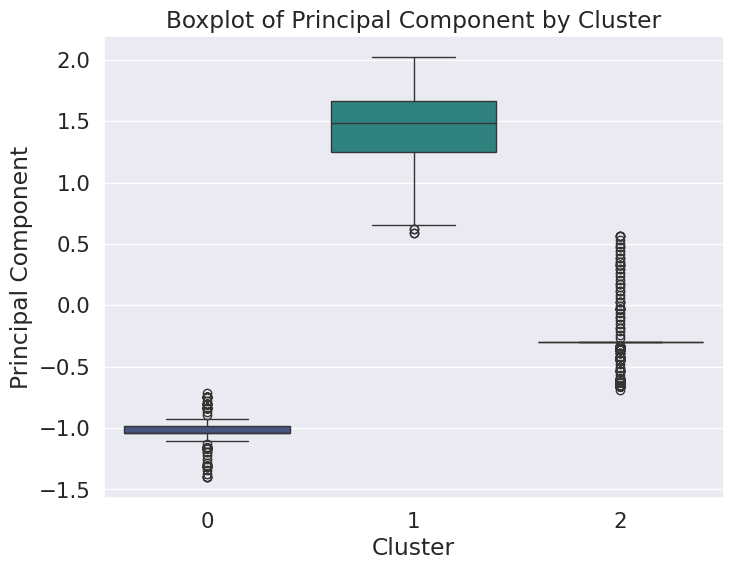

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x=data['cluster'], y=X_pca.flatten(), palette='viridis')
plt.title('Boxplot of Principal Component by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Principal Component')
plt.show()


In [ ]:
print("\nData dengan Label Prioritas (Urgensi):")
print(data[['jenis_laporan', 'cluster', 'urgensi']].head())


Data dengan Label Prioritas (Urgensi):
       jenis_laporan  cluster urgensi
ID                                   
13291             97        1  Sedang
14538             95        1  Sedang
12475             19        0  Rendah
12497             37        2  Tinggi
12905            110        1  Sedang


<ipython-input-44-2d69c5af67fb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=data, palette='viridis')


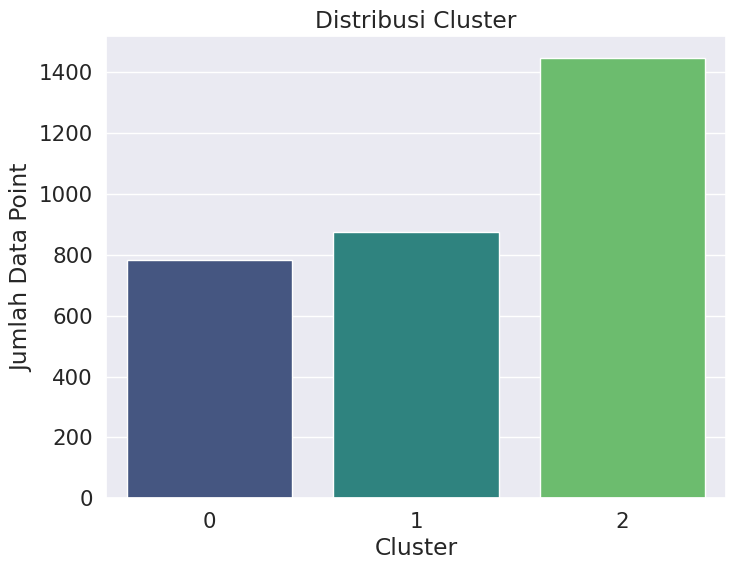

In [ ]:
# Countplot of clusters
plt.figure(figsize=(8, 6))
sns.countplot(x='cluster', data=data, palette='viridis')
plt.title('Distribusi Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data Point')
plt.show()

#NAIVE BAYES

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, data['urgensi'], test_size=0.2, random_state=42)

In [ ]:
nb_model = MultinomialNB()

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer

# Mengubah stop_words_id menjadi list dari set
stop_words_id = list(stopwords.words('indonesian'))  # Menggunakan stop words bahasa Indonesia dalam bentuk list

# Create a copy of the 'jenis_laporan' column before converting to numerical codes
jenis_laporan_text = data['jenis_laporan'].astype(str)

# Apply TF-IDF to the text data
tfidf = TfidfVectorizer(max_features=1000, stop_words=stop_words_id)
tfidf_matrix = tfidf.fit_transform(jenis_laporan_text).toarray()  # Use the text copy here

# Now you can safely convert 'jenis_laporan' to numerical codes
data['jenis_laporan'] = data['jenis_laporan'].astype('category').cat.codes

# ... (rest of your code)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


In [ ]:
# Menggunakan hasil TF-IDF langsung tanpa normalisasi tambahan
X = np.hstack((data[['jenis_laporan']].values, tfidf_matrix))

In [ ]:
# Pisahkan data untuk pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, data['urgensi'], test_size=0.2, random_state=42)


In [ ]:

# Model Naive Bayes (Multinomial Naive Bayes cocok untuk data non-negatif)
nb_model = MultinomialNB()

In [ ]:
# Melatih model
nb_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Prediksi pada data uji
y_pred = nb_model.predict(X_test)

#EVALUASI

In [ ]:
!pip install scikit-learn
from sklearn.metrics import accuracy_score

#Mengukur akurasi dan confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAkurasi Model Naive Bayes: {accuracy * 100:.2f}%')


Akurasi Model Naive Bayes: 95.65%


In [ ]:
from sklearn.metrics import classification_report

# Menampilkan precision, recall, dan F1-score
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=['Rendah', 'Sedang', 'Tinggi']))


Laporan Klasifikasi:
              precision    recall  f1-score   support

      Rendah       1.00      0.84      0.91       157
      Sedang       0.99      1.00      0.99       178
      Tinggi       0.92      0.99      0.95       286

    accuracy                           0.96       621
   macro avg       0.97      0.94      0.95       621
weighted avg       0.96      0.96      0.96       621



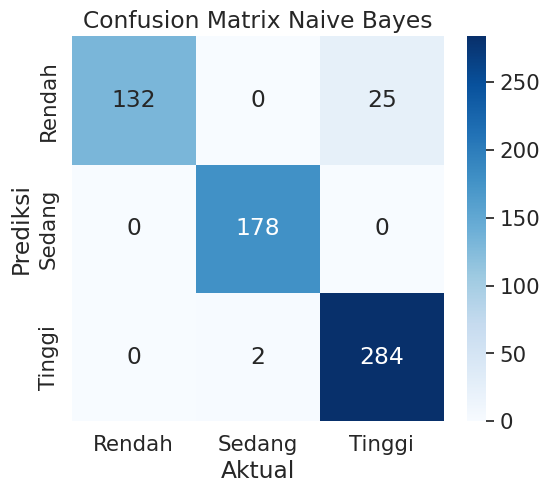

In [ ]:
plt.figure(figsize=(6, 5))
from sklearn.metrics import confusion_matrix  # Import the function
cm = confusion_matrix(y_test, y_pred)  # Calculate the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Rendah', 'Sedang', 'Tinggi'], yticklabels=['Rendah', 'Sedang', 'Tinggi'])
plt.title('Confusion Matrix Naive Bayes')
plt.ylabel('Prediksi')
plt.xlabel('Aktual')
plt.show()

Cek Kategori Urgensi

In [ ]:
mapping = dict(enumerate(data['jenis_laporan'].astype('category').cat.categories))

In [ ]:
# Mengonversi nilai numerik di list ke label asli
# Topik-topik untuk kategori Tinggi
topik_tinggi = data[data['urgensi'] == 'Tinggi']['jenis_laporan'].unique()
print("Topik dalam kategori Tinggi:")
print(topik_tinggi)

# Topik-topik untuk kategori Sedang
topik_sedang = data[data['urgensi'] == 'Sedang']['jenis_laporan'].unique()
print("\nTopik dalam kategori Sedang:")
print(topik_sedang)

# Topik-topik untuk kategori Rendah
topik_rendah = data[data['urgensi'] == 'Rendah']['jenis_laporan'].unique()
print("\nTopik dalam kategori Rendah:")
print(topik_rendah)

Topik dalam kategori Tinggi:
[37 25 29 36 35 32 63 33 34 24 60 26 27 49 58 30 57 59 50 64 55 46 41 38
 40 56 43 62 51 66 48 54 65 44 28 53 47 52 42 61 45 39 31]

Topik dalam kategori Sedang:
[ 97  95 110  75  91  89  69 114  86  83  84 104 108  88  77  70  68 106
  82 115 103 113 107  67  72 112  74  96 102 101  76  85  78  99  94 111
  92  98  73  79  80  93  90 109  87  81  71 105 100]

Topik dalam kategori Rendah:
[19 14 22  8  6  3  1  9 10 12 15 16 17 20 18  0 21  2  7  4 11  5 23 13]


In [ ]:
print("\nData dengan Label Prioritas (Urgensi):")
print(data[['jenis_laporan', 'stemming', 'cluster', 'urgensi']])


Data dengan Label Prioritas (Urgensi):
       jenis_laporan                                       stemming  cluster  \
ID                                                                             
13291             97                                 selokan mampet        1   
14538             95                                        selokan        1   
12475             19                                    batas jalan        0   
12497             37                                    jalan rusak        2   
12905            110                                        trotoar        1   
12613             95                                        selokan        1   
12615            110                                        trotoar        1   
12924            110                                        trotoar        1   
13038             37                                    jalan rusak        2   
12633             95                                        selokan        1   


In [ ]:
# Menampilkan jumlah total kemunculan untuk masing-masing kategori
total_stemming = data['stemming'].value_counts()
total_cluster = data['cluster'].value_counts()
total_urgensi = data['urgensi'].value_counts()

# Menampilkan hasil
print("\nTotal Kemunculan Setiap Kategori Stemming:")
print(total_stemming)

print("\nTotal Kemunculan Setiap Cluster:")
print(total_cluster)

print("\nTotal Kemunculan Setiap Kategori Urgensi:")
print(total_urgensi)


Total Kemunculan Setiap Kategori Stemming:
stemming
jalan rusak                                      1037
banjir                                            391
banjir rob                                        161
selokan                                           161
selokan mampet                                    133
infrastruktur                                     127
dampak baik jalan                                 124
bangun talud                                       90
sungai dangkal                                     86
rencana jalan                                      83
salur air                                          60
trotoar                                            58
baik jalan                                         46
tutup selokan                                      45
pompa air                                          41
tutup salur air                                    40
dampak lingkung                                    36
rumah pompa                  


Train-Test Split Ratio 90:10
Accuracy: 94.21%
              precision    recall  f1-score   support

      Rendah       1.00      0.79      0.89        78
      Sedang       0.98      1.00      0.99        93
      Tinggi       0.90      0.99      0.94       140

    accuracy                           0.94       311
   macro avg       0.96      0.93      0.94       311
weighted avg       0.95      0.94      0.94       311


Train-Test Split Ratio 80:20
Accuracy: 95.65%
              precision    recall  f1-score   support

      Rendah       1.00      0.84      0.91       157
      Sedang       0.99      1.00      0.99       178
      Tinggi       0.92      0.99      0.95       286

    accuracy                           0.96       621
   macro avg       0.97      0.94      0.95       621
weighted avg       0.96      0.96      0.96       621


Train-Test Split Ratio 70:30
Accuracy: 95.28%


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

      Rendah       1.00      0.82      0.90       230
      Sedang       0.99      1.00      0.99       270
      Tinggi       0.91      0.99      0.95       432

    accuracy                           0.95       932
   macro avg       0.97      0.94      0.95       932
weighted avg       0.96      0.95      0.95       932



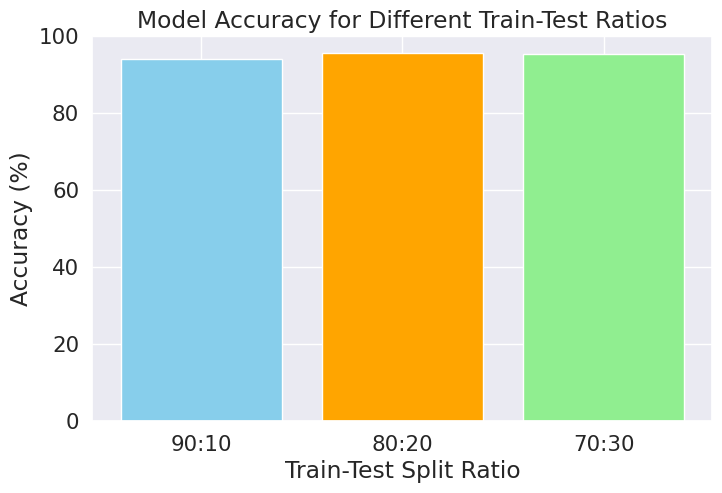

In [ ]:
# TF-IDF Transformation
tfidf = TfidfVectorizer(max_features=1000, stop_words=stop_words_id)
tfidf_matrix = tfidf.fit_transform(jenis_laporan_text).toarray()
data['jenis_laporan'] = data['jenis_laporan'].astype('category').cat.codes

# Combine features
X = np.hstack((data[['jenis_laporan']].values, tfidf_matrix))
y = data['urgensi']

# Define train-test split ratios
ratios = [0.1, 0.2, 0.3]  # Corresponds to 90:10, 80:20, 70:30 splits
results = []

for ratio in ratios:
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=42)

    # Train Naive Bayes model
    nb_model = MultinomialNB()
    nb_model.fit(X_train, y_train)

    # Evaluate model
    y_pred = nb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((ratio, accuracy))

    # Classification Report
    print(f"\nTrain-Test Split Ratio {int((1-ratio)*100)}:{int(ratio*100)}")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(classification_report(y_test, y_pred, target_names=['Rendah', 'Sedang', 'Tinggi']))

# Visualization
ratios_labels = [f"{int((1-r)*100)}:{int(r*100)}" for r in ratios]
accuracies = [result[1] * 100 for result in results]

plt.figure(figsize=(8, 5))
plt.bar(ratios_labels, accuracies, color=['skyblue', 'orange', 'lightgreen'])
plt.xlabel("Train-Test Split Ratio")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy for Different Train-Test Ratios")
plt.ylim(0, 100)
plt.show()